## American Income Run Time

In [10]:
from pmlb import fetch_data
import numpy as np
import pandas as pd
import time
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters
import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv("American_Income.csv")
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
start_time = time.time()
synth = RegularSynthesizer(modelname='fast')
synth.fit(data=data, num_cols=numerical_cols, cat_cols=categorical_cols)
synth_data = synth.sample(32561)
end_time = time.time()
y_data_time_used = end_time - start_time
print("The time Y-data used for generating the same number of rows is: " + str(y_data_time_used) + " seconds")

Hyperparameter search: 100%|██████████| 8/8 [04:38<00:00, 34.81s/it]


The time Y-data used for generating the same number of rows is: 279.9637203216553 seconds


In [6]:
synth_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,33,Private,168899,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,10123,399,43,United-States,<=50K
1,47,Private,260414,HS-grad,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,5655,1049,52,United-States,>50K
2,42,Self-emp-not-inc,239851,Bachelors,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-587,883,56,United-States,>50K
3,46,State-gov,339918,Some-college,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,-7851,155,29,United-States,<=50K
4,62,Private,101874,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,14717,-319,36,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,35,Private,155538,Some-college,7,Never-married,Adm-clerical,Unmarried,White,Female,318,489,31,United-States,<=50K
32557,33,Private,221859,Bachelors,12,Never-married,Prof-specialty,Own-child,White,Female,-2690,-93,32,United-States,<=50K
32558,28,Private,139584,Bachelors,12,Never-married,Other-service,Own-child,White,Female,870,-568,23,United-States,<=50K
32559,24,Private,98848,Some-college,8,Never-married,Exec-managerial,Own-child,White,Male,-1639,559,25,United-States,<=50K


## Crab Age Varies Rows Runtime

In [7]:
from pmlb import fetch_data
import numpy as np
import pandas as pd
import time
from ydata_synthetic.synthesizers.regular import RegularSynthesizer
from ydata_synthetic.synthesizers import ModelParameters, TrainParameters



data = pd.read_csv("crab_age.csv")
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data_size_vary_sdv = {}
timings = []
for i in range (9):
    start_time = time.time()
    synth = RegularSynthesizer(modelname='fast')
    synth.fit(data=data, num_cols=numerical_cols, cat_cols=categorical_cols)
    synth_data = synth.sample((i+1)*10000)
    end_time = time.time()
    y_data_time_used = end_time - start_time
    timings.append(((i+1)*10000, end_time - start_time))
    print(timings)
    data_size_vary_sdv[str((i+1)*10000) + "rows data"] = synth_data


timing_df = pd.DataFrame(timings, columns = ["Rows", "Time (seconds)"])
timing_df

Hyperparameter search: 100%|██████████| 8/8 [09:49<00:00, 73.67s/it]


[(10000, 589.5723440647125)]


Hyperparameter search: 100%|██████████| 8/8 [09:42<00:00, 72.85s/it]


[(10000, 589.5723440647125), (20000, 582.9691133499146)]


Hyperparameter search: 100%|██████████| 8/8 [10:18<00:00, 77.30s/it]


[(10000, 589.5723440647125), (20000, 582.9691133499146), (30000, 618.6466407775879)]


Hyperparameter search: 100%|██████████| 8/8 [09:57<00:00, 74.69s/it]


[(10000, 589.5723440647125), (20000, 582.9691133499146), (30000, 618.6466407775879), (40000, 597.7699062824249)]


Hyperparameter search: 100%|██████████| 8/8 [09:49<00:00, 73.64s/it]


[(10000, 589.5723440647125), (20000, 582.9691133499146), (30000, 618.6466407775879), (40000, 597.7699062824249), (50000, 589.3357026576996)]


Hyperparameter search: 100%|██████████| 8/8 [10:07<00:00, 75.98s/it]


[(10000, 589.5723440647125), (20000, 582.9691133499146), (30000, 618.6466407775879), (40000, 597.7699062824249), (50000, 589.3357026576996), (60000, 608.103081703186)]


Hyperparameter search: 100%|██████████| 8/8 [09:58<00:00, 74.80s/it]


[(10000, 589.5723440647125), (20000, 582.9691133499146), (30000, 618.6466407775879), (40000, 597.7699062824249), (50000, 589.3357026576996), (60000, 608.103081703186), (70000, 598.6671273708344)]


Hyperparameter search: 100%|██████████| 8/8 [10:00<00:00, 75.02s/it]


[(10000, 589.5723440647125), (20000, 582.9691133499146), (30000, 618.6466407775879), (40000, 597.7699062824249), (50000, 589.3357026576996), (60000, 608.103081703186), (70000, 598.6671273708344), (80000, 600.3750848770142)]


Hyperparameter search: 100%|██████████| 8/8 [09:58<00:00, 74.79s/it]


[(10000, 589.5723440647125), (20000, 582.9691133499146), (30000, 618.6466407775879), (40000, 597.7699062824249), (50000, 589.3357026576996), (60000, 608.103081703186), (70000, 598.6671273708344), (80000, 600.3750848770142), (90000, 598.5414252281189)]


,Rows,Time (seconds)
0,10000,589.572344
1,20000,582.969113
2,30000,618.646641
3,40000,597.769906
4,50000,589.335703
5,60000,608.103082
6,70000,598.667127
7,80000,600.375085
8,90000,598.541425


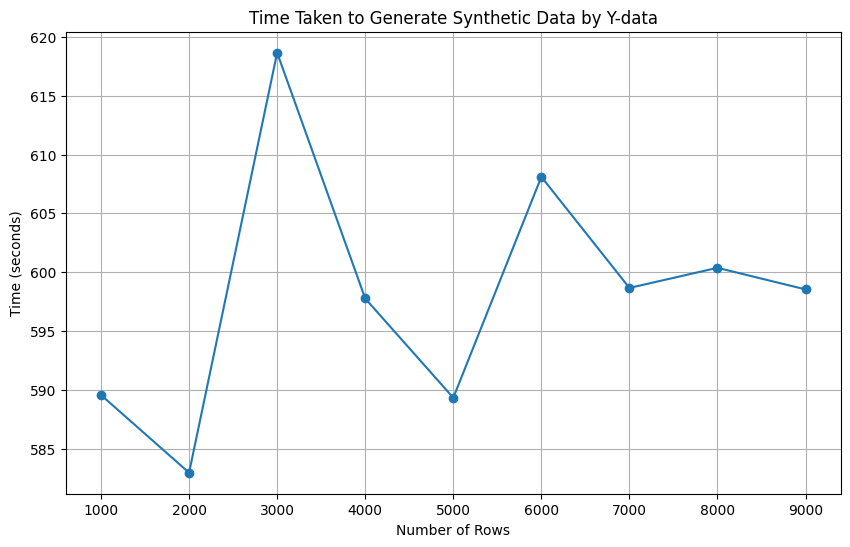

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(timing_df['Rows'], timing_df['Time (seconds)'], marker='o', linestyle='-')
plt.title('Time Taken to Generate Synthetic Data by Y-data')
plt.xlabel('Number of Rows')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()